<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>05 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

<div class="alert alert-danger">
<br>
Karar ağaçlarına bakmadan önce bilgilerinizi gözden geçirmek isterseniz aşağıdaki konulara bakmanızı öneririm:  <br>
<br>
ÖN KOŞULLAR
    <br><a href="https://www.datafloyd.com/tr/pyhton-numpy-kutuphanesinin-kullanimi/">Numpy kütüphanesinin kullanımı</a>
    <br><a href="">Temel Python kullanımı</a>
</div>

<!-- ICONS -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">

<!-- BOOTSTRAP -->
<!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">

<!-- jQuery library -->
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>

<!-- Latest compiled JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>

# Veri Biliminin Temelleri - Karar ağaçlarına giriş 

<a id="ret_main"></a>
<i class="fa fa-home" style="font-size:24px;color:Tomato"></i>
##  İÇİNDEKİLER 
Sorular
* [Karar Ağaçları neden bu kadar önemli ve özel?](#neden_dt)
* ["Stump" yapıları](#stump)
* [Tanımlamalar](#temel_tanimlar)
* [Karar ağacı tipleri](#dt_tip)
* [Temel konseptler](#temel_konseptler)
* [Python örneği](#python_kod)
* [Karar ağacı görselleştirme](#dt_viz)

Dikkat size çok önemli bir sır vereceğim: Karar ağaçları çok önemli ve temel bir algoritmadır :)  <br> Makine öğrenmesinin yanısıra, ağaç yapısı; bilgisayar bilimcilerin "olmazsa olmaz" türünde her zaman başvurdukları bir veri yapısıdır.

![dt_tolkien](dt_tolkien.jpg)
<p style="text-align: center;"> <i>JRR Tolkien'ın entler için ilham aldığı söylenen Oxford'daki ağaç<i> </p>

<i class="fa fa-home" style="font-size:18px;color:Tomato"></i>[İÇİNDEKİLERE GERİ DÖN](#ret_main)<br>
<a id="neden_dt"></a>

<div class="alert alert-info">
<b>Soru :</b> Karar ağaçlarını çok önemli kılan özellikler nelerdir? Anlat bakalım! <br>
</div>

<div class="alert alert-success">
<b>Cevap :</b> <br>Bakın şimdi önceklikle karar ağaçları genel olarak "anlaşılabilir" (interpretable) yapılardır.<br> Sonuçta herşey insan için, insan alayacak bunu... Yani bir ağaca baktığınızda neden belirli bir kararı verdiğini anlamanız "teoride" mümkün. Hepinizin tahmin edebileceği gibi bu bir reklam cümlesiydi, tabii ki de pratikte yüzlerce özniteliğe ve binlerce karar düğümüne sahip bir ağacı anlamak çok olası değildir ama olsun yapıları çok güzel ne yapalım! Nihayetinde ağaç ne kadar anlaşılmaz olabilir ki :) <br><br>

</div>

<i class="fa fa-home" style="font-size:18px;color:Tomato"></i>[İÇİNDEKİLERE GERİ DÖN](#ret_main)<br>
<a id="stump"></a>

<div class="alert alert-info">
<b>Soru :</b> Kütük (Stump) diye bir şey duydum, bu ne ola ki?<br>
</div>

<div class="alert alert-success">
<b>Cevap :</b> <br> Bana bakarak kütük demezseniz sevirim... Ama karar ağaçlarına en güzel başlangıç noktası kütüktür bence, iyi duymuşsunuz, kütük candır.<br>
"Stump"ları anlatmadan ve daha derine inmeden önce biraz kitabi bilgi ve tanımlama vermenin tam zamanı, başka türlü ilerlemek hepimizi kastırır, baştan söyleyeyim

</div>

<a id="temel_tanimlar"></a>

<div class="well">
Karar ağaçları ile ilgili temel tanımlamalar aşağıdaki şekilde (ikili ve sınıflandırma yapan bir ağaç için) verilmektedir.
    <ul>
        <li>Kök düğüm: Ağacın başlangıç düğümüdür. İlk değerlendirme burada yapılır </li>
        <li>Dallar: Her düğümden çıkan karar kollarıdır. Düğümdeki değerlendirme kriterine göre sağa veya sola ayrım gerçekleşir</li>
        <li>Yapraklar: Ağacın sonladırılarak kararın verildiği veya skor değerinin oluşturulduğu düğümlerdir. </li>
        <li>Karar kriteri: Karşılaştırılacak kriterin ne olduğu bu düğümlerde belirtilir. </li>
    </ul>
</div>

![dt_tanim.PNG](dt_tanim.PNG)

<div class="alert alert-success">
"Stump" yani kütük diye tabir ettiğimiz yapı sadece kök düğüm, buna bağlı iki dal ve sonunda iki yapraktan oluşur. Yani gövdesi kesilmiş bir ağaç gibidir. Kütük gibi durduğuna bakmayın bunlarında sınıflandırıcı birleştirme ile çok başarılı sonuçlar verdiğini bilmenizde fayda var.
</div>

<i class="fa fa-home" style="font-size:18px;color:Tomato"></i>[İÇİNDEKİLERE GERİ DÖN](#ret_main)<br>
<a id="dt_tip"></a>

<div class="alert alert-info">
<b>Soru :</b> Biliyorsunuz doğada farklı farklı ağaçlar var burada da farklı farklı karar ağaçları var mıdır?<br>
</div>
<div class="alert alert-success">
<b>Cevap :</b> Analoji yapmanıza bayıldım doğrusu evet farklı ağaçtipleri mevcut. Temelde verdiği çıktıya göre ikiye ayrılıyor ağaçlar. <br>
<ul>
    <li>Sınıflandırma ağaçları (classification trees)</li>
        <ul>
            <li>Çıktısı kategorik bir değişkendir</li>
        </ul>
    <li>Regresyon ağaçları (regression trees)</li>
        <ul>
            <li>Çıktısı sürekli (continous) bir değişkendir</li>
        </ul>
</ul>
Aynı düğümden eğer iki adet dal çıkıyorsa buna ikili ağaç (binary tree) denilmektedir. Ne yalan söyleyeyim düğümlerinden üç tane dal çıkan ağacı ben kitaplar dışında görmedim kullanmadım. 
</div>

<i class="fa fa-home" style="font-size:18px;color:Tomato"></i>[İÇİNDEKİLERE GERİ DÖN](#ret_main)<br>
<a id="temel_konseptler"></a>

<div class="alert alert-info">
<b>Soru :</b> Başka ne tür anahtar kelimeleri / konseptleri bilmemiz gerekiyor?<br>
</div>
<div class="alert alert-success">
<b>Cevap :</b>  Özetlemeye çalışayım
</div>

1. **Bölünme sayısı (number of splits):** Ağaçlardaki her bölünme bir karara karşılık gelmektedir. Yani bir veri seti düğümlerdeki kriterlere geldiği zaman oradaki karar kriteri uyarınca ikiye bölünür. Bazı durumlarda en fazla bölünme sayısını limitlemek isteyebiliriz.
2. **Düğüm kirliliğinin (impurity) ölçülmesi ve bri düğüm için en iyi özniteliğin seçilmesi:** Ağaçların eğitim aşamasında her düğüm için uygun bir öznitelik seççilmeli ve bu öznitelik için bir eşik seviyesi belirlenmelidir. Bunu yaparken bazı ölçütler kullanılabilir. En önemlileri "entropy", "variance", "gini" ve "misclassification", "impurity"leridir.
3. **Ağacın bölünmesinin durdurulması:"** Ağacın büyümesi aşağıdaki kriterler kullanılarak kontrol altında tutulabilir:
    1. Validasyon setinde hata artmaya başladığında
    2. Bir alt düğümde "impurity" kazancı belirli bir eşik seviyesinin altındaysa
    3. Bir düğümde eğitim için belirli sayının altında örnek varsa.
    4. Ağacın kompleksliği belirli bir ölçütün üzerindeyse
    5. Daha fazla büyümek kazanç sağlamıyorsa
4. **Ağacın budanması (prune):** Bazı durumlarda bir durdurma kriteri yerine önce büyütülen ağacın sonradan budanması daha faydalı olabilmektedir. Bu literatürde ufuk etkisi (horizon effect) denilen olayın engellenmesi için yapılmaktadır. Ufuk etkisi, ağacın büyümesinin engellenmesi sonucu faydalı bölütlemeleri elde edememe durumu olarak tanımlanmaktadır.
5. **Yaprak düğümlere bir sınıf etiketi yapıştırılması (sınıflandırma problemleri için):** Yaprak düğümüne kadar gelen örneğe  bir sınıf atanması gerektiğinde bunu yapmanın en basit yollarından biri eğitim sırasında bu yaprak düğüme atanan çoğunluk örneklerin etiketlerinin atanmasıdır.
6. **Ağacın derinliği (Tree Depth):** Kök düğümden yaprak düğüme kadar en fazla kaç adet atlama ile gelineceğinin ölçüsüdür.
7. **"Child"(çocuk),"Parent"(ebeveyn) düğüm kavramları:** Bir düğümün altındaki diğer düğüm o düğümün "child"'ı olur. Tahmin edeceğiniz üzere her "child"ın da "parent"ı onun bağlı olduğu düğümdür.  

</div>
<div class="alert alert-success">
Kitabi bilgiyi biraz fazla kaçırdım sanırım, silmeye de kıyamadım neyse dursun şimdilik. Sorunuz olursa bana mesaj atın değerlendirelim birlikte. 
</div>

<i class="fa fa-home" style="font-size:18px;color:Tomato"></i>[İÇİNDEKİLERE GERİ DÖN](#ret_main)<br>
<a id="python_kod"></a>

<div class="alert alert-info">
<b>Soru :</b> Kodlama zamanı gelmedi mi hala?<br>
</div>
<div class="alert alert-success">
<b>Cevap :</b>  Geldi, geldi tamam kodlamaya başlayalım artık. <br> İris veri setini sürekli kullanıyoruz gına geldi biliyorum ama çok standart bir örnek ve anlaması kolay. Onunla bir başlayalım, ilerleyen sürümlerde söz başka veri seti de kullanacağım
</div>

In [1]:
# iris veri setini yüklüyoruz
from sklearn import datasets
iris = datasets.load_iris()

# veri setini bölebilmek için gerekli eklemeleri de yapalım
from sklearn.model_selection import train_test_split

# scikit learn kullanarak karar ağaçları sınıflandırıcısını çağırıyoruz.
from sklearn.tree import DecisionTreeClassifier

# şimdi bir sınıflandırıcı oluşturalım
dt = DecisionTreeClassifier(criterion="gini", 
                            # düğüm noktasında impurity nasıl ölçülecek
                           max_depth = 3)
                            # Ağacın maksimum derinliği
    

# iris verisini bölelim .33 test olsun geri kalan train olsun
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.33,
                                                   random_state=42)

# şimdi karar ağacını eğitelim
dt.fit(X_train,y_train)

# hata hesaplayalım
y_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy score: " + str(accuracy_score(y_test,y_pred)))

Accuracy score: 0.98


Gördüğünüz gibi bu derece basit bir yapı ile bile %98 "accuracy" elde ettik.

<i class="fa fa-home" style="font-size:18px;color:Tomato"></i>[İÇİNDEKİLERE GERİ DÖN](#ret_main)<br>
<a id="dt_viz"></a>

<div class="alert alert-info">
<b>Soru :</b> Bu nasıl karar ağacı hiçbir şey anlamadım doğrusu... <br>
</div>
<div class="alert alert-success">
<b>Cevap :</b> Ben de bu yorumu bekliyordum :) Görselleştirme olmadan tam anlamıyla anlamış sayılmayız. Bu karar ağacını görselleştirmek için ayrı bir araç kullanmamız gerekecek. <br><br>
Burada yeni başlayanlar biraz kafa karışıklığı yaşabilir. Aslında bence de karışık scikit-learn'de ağaçları görselleştirmek içn entegre bir metot olması iyi olurdu ama yok ne yazık ki... Yaptığımız şey şu: Scikit-learn ağaç yapısını ".dot" formatında kaydediyor, biz de bunu graphviz ile png formatına çevirip görselleştiriyoruz.
</div>

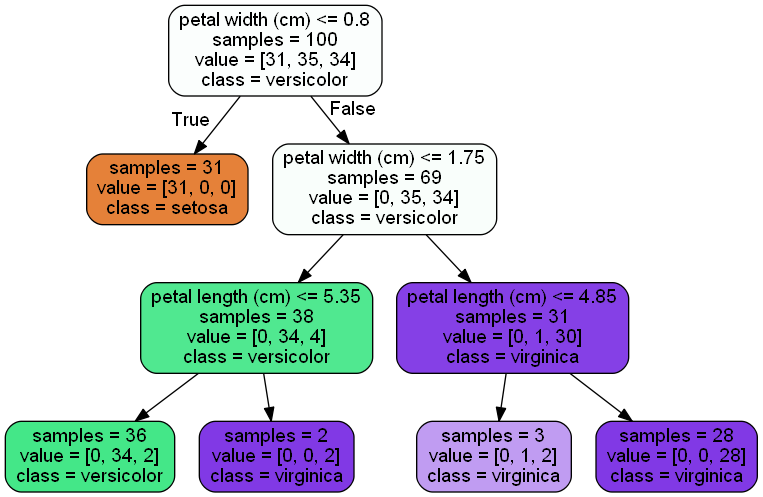

In [2]:
# graphviz çağrılıyor
from sklearn.tree import export_graphviz
# resim göstermesi için
from IPython.display import Image
# bu çıktıyı yazdırmak yerine string olarak kaydetmek için 
from sklearn.externals.six import StringIO
# burasının konuyla alakası yok, çıktı için bir nesne yaratılıyor
dt_data =StringIO()
# ağacı dışarıya aktarıyoruz
export_graphviz(dt, out_file=dt_data,filled=True,rounded=True,impurity=False,
               feature_names=iris.feature_names,
               class_names=iris.target_names)
# pydotplus kütüphanesini çağıralım ve grafik yaratalım
import pydotplus
graph = pydotplus.graph_from_dot_data(dt_data.getvalue())
# bu grafiği gösterelim
Image(graph.create_png())

<div class="well">
İlk kök düğümü incelersek "petal length" 2.45 cm'den küçük veya eşitse bu örnekler "setosa" olarak sınıflandırılıyor. Kök düğümün sağı biraz daha karışık. Nihayetinde yaprak düğümlerde sınıfa ait bir karar veriliyor. Her düğüm özelinde mevcut 3 sınıftan hangisinin ne kadar örneğe sahip olduğu da görülebilir.
</div>

<div class="alert alert-success">
Sanırım şimdilik bu kadar bir giriş yeter. Sorularınız olursa bekliyorum. Görüşmek üzere</div>